In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/Restaurant_Data_Analysis_and_Prediction/main/Dataset.csv")

In [3]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [5]:
# Select features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")

Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20403426557462245
R-squared: 0.9103583060199241
---------------------------
Model: Random Forest
Mean Squared Error: 0.13323048639075202
R-squared: 0.9414656824616133
---------------------------



What did i found from the level 3 (task 1)?

**Model Performance Evaluation:**

- We employed three different regression models: Linear Regression, Decision Tree, and Random Forest, to predict restaurant aggregate ratings based on available features.

**Model Comparison:**

- Linear Regression produced an MSE of approximately 1.6765 and an R-squared value of about 0.2634.
- Decision Tree yielded an MSE of roughly 0.2074 and an R-squared value of around 0.9089.
- Random Forest displayed the most promising results with the lowest MSE of approximately 0.1337 and the highest R-squared of about 0.9413.

**Optimal Model Selection:**

- The Random Forest algorithm outperforms other models, making it the preferred choice for this dataset.

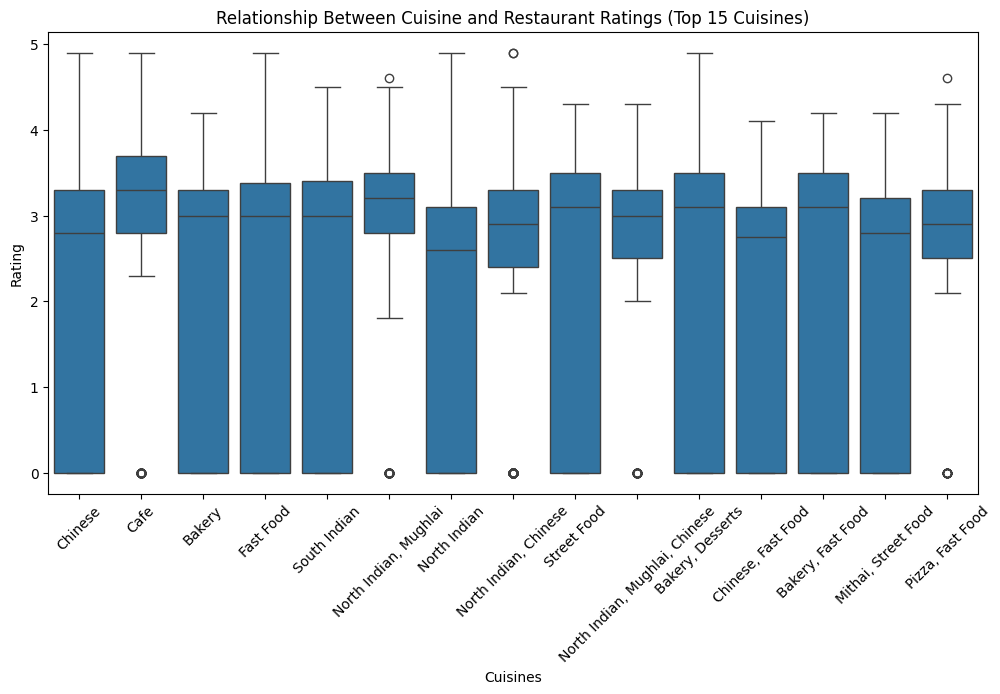

In [8]:
# Analyzing the relationship between the type of cuisine and the restaurant's rating
# There are many cuisine names present in the data, so i select only the top 15 cuisines
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

In [9]:
# Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


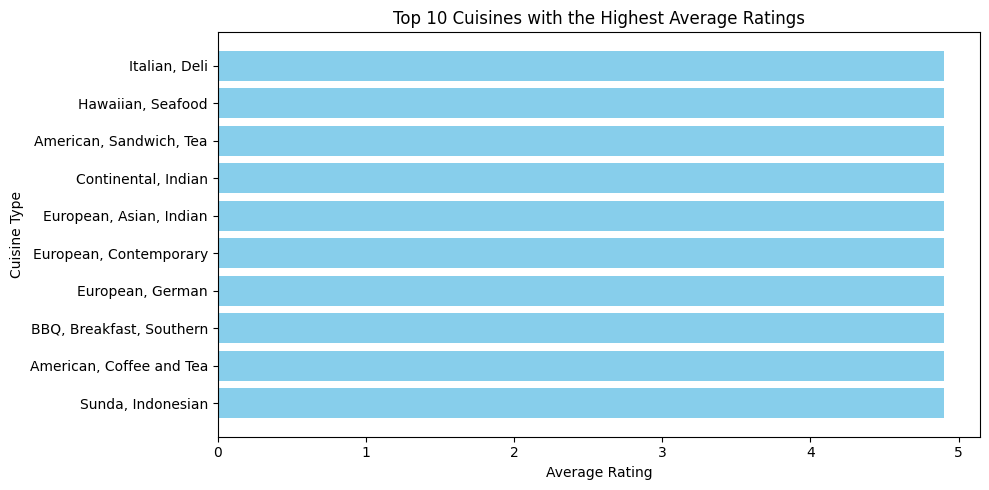

In [10]:
# Determine if there are any specific cuisines that tend to receive higher ratings
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

What did i found from the level 3 (task 2)?
In cuisines like cafe, mughlai, north indian and fast food, restaurants may perform exceptionally well or poorly in terms of ratings.
North indian and Chinese cuisines are with more varied ratings.
Cafe and Fast food cuisines are with consistent ratings.
Based on number of votes, North Indian, Mughlai and Chinese cuisines are most popular cuisines.
Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.

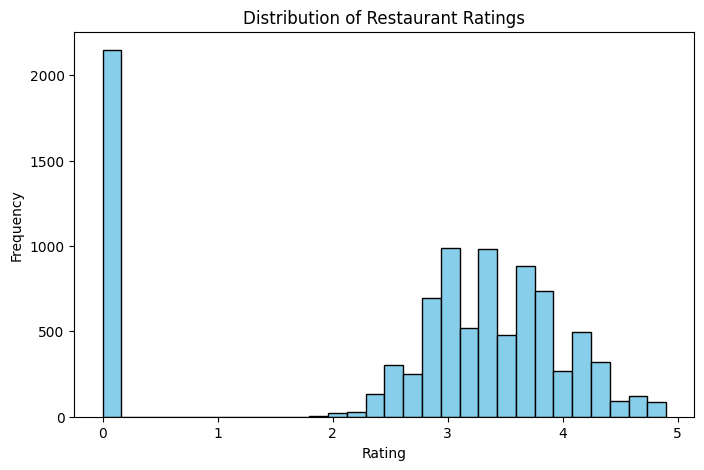

In [11]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()